In [83]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans



### Importa los datos
Dataset con diferentes fármacos, sus efectos y ratings de los clientes.

Importa el dataset *drugLibTrain_raw.tsv*

In [84]:
df = pd.read_csv(r"C:\Users\mareg\OneDrive\Documentos\TheBridge_Enero\Machine_Learning\2-No_Supervisado\3-Clustering\Practica\data\drugLibTrain_raw.tsv",
                  sep="\t", index_col=0)

In [85]:
df.head(10)

,urlDrugName,rating,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview
2202,enalapril,4,Highly Effective,Mild Side Effects,management of congestive heart failure,slowed the progression of left ventricular dys...,"cough, hypotension , proteinuria, impotence , ...","monitor blood pressure , weight and asses for ..."
3117,ortho-tri-cyclen,1,Highly Effective,Severe Side Effects,birth prevention,Although this type of birth control has more c...,"Heavy Cycle, Cramps, Hot Flashes, Fatigue, Lon...","I Hate This Birth Control, I Would Not Suggest..."
1146,ponstel,10,Highly Effective,No Side Effects,menstrual cramps,I was used to having cramps so badly that they...,Heavier bleeding and clotting than normal.,I took 2 pills at the onset of my menstrual cr...
3947,prilosec,3,Marginally Effective,Mild Side Effects,acid reflux,The acid reflux went away for a few months aft...,"Constipation, dry mouth and some mild dizzines...",I was given Prilosec prescription at a dose of...
1951,lyrica,2,Marginally Effective,Severe Side Effects,fibromyalgia,I think that the Lyrica was starting to help w...,I felt extremely drugged and dopey. Could not...,See above
2372,propecia,1,Ineffective,Severe Side Effects,hair loss,"after taking propecia for over a year, startin...","Low sex drive, before i started taking this dr...",one pill once daily
1043,vyvanse,9,Highly Effective,Mild Side Effects,add,"My mood has noticably improved, I have more en...","a few experiences of nausiea, heavy moodswings...",I had began taking 20mg of Vyvanse for three m...
2715,elavil,10,Considerably Effective,No Side Effects,depression,Although this drug was originally prescribed f...,None.,"One a day, taken about an hour before bedtime."
1591,xanax,10,Highly Effective,No Side Effects,panic disorder,This simply just works fast and without any of...,I really don't have any side effects other tha...,I first started taking this at 3 times per day...
1686,claritin,1,Ineffective,Extremely Severe Side Effects,allergies,none - did nothing to help allergies. i just h...,I had some horrifying mental and physical side...,took one 10 mg pill nightly.


In [86]:
df.shape

(3107, 8)

### Descriptive Analysis

Quedate únicamente con las columnas que podamos manejar: Columnas numéricas y columnas categoricas con pocas categorias (menos de 10)

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3107 entries, 2202 to 2748
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   urlDrugName        3107 non-null   object
 1   rating             3107 non-null   int64 
 2   effectiveness      3107 non-null   object
 3   sideEffects        3107 non-null   object
 4   condition          3106 non-null   object
 5   benefitsReview     3107 non-null   object
 6   sideEffectsReview  3105 non-null   object
 7   commentsReview     3099 non-null   object
dtypes: int64(1), object(7)
memory usage: 218.5+ KB


In [88]:
df.columns

Index(['urlDrugName', 'rating', 'effectiveness', 'sideEffects', 'condition',
       'benefitsReview', 'sideEffectsReview', 'commentsReview'],
      dtype='object')

In [89]:
for col in df.columns:
    if  df[col].nunique() > 10:
        df.drop (col, axis=1, inplace=True),



In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3107 entries, 2202 to 2748
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   rating         3107 non-null   int64 
 1   effectiveness  3107 non-null   object
 2   sideEffects    3107 non-null   object
dtypes: int64(1), object(2)
memory usage: 97.1+ KB


#### Transforma las columnas categoricas

Transforma las columnas categoricas a numericas mediante dummies

In [91]:
pd.get_dummies(data=df)

,rating,effectiveness_Considerably Effective,effectiveness_Highly Effective,effectiveness_Ineffective,effectiveness_Marginally Effective,effectiveness_Moderately Effective,sideEffects_Extremely Severe Side Effects,sideEffects_Mild Side Effects,sideEffects_Moderate Side Effects,sideEffects_No Side Effects,sideEffects_Severe Side Effects
2202,4,0,1,0,0,0,0,1,0,0,0
3117,1,0,1,0,0,0,0,0,0,0,1
1146,10,0,1,0,0,0,0,0,0,1,0
3947,3,0,0,0,1,0,0,1,0,0,0
1951,2,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
1039,10,0,1,0,0,0,0,1,0,0,0
3281,1,0,0,1,0,0,1,0,0,0,0
1664,2,0,0,0,1,0,0,0,1,0,0
2621,8,1,0,0,0,0,0,1,0,0,0


In [92]:
my_dict = {"Ineffective":0,
            "Marginally Effective":1,
            "Moderately Effective":2,
            "Considerably Effective":3,
            "Highly Effective":4}

In [93]:
df.head()
df['effectiveness'].unique()

array(['Highly Effective', 'Marginally Effective', 'Ineffective',
       'Considerably Effective', 'Moderately Effective'], dtype=object)

In [94]:
df['New_effectiveness'] = df.effectiveness.map(my_dict)
    

In [95]:
my_dict1 = {"No Side Effects":0,
            "Mild Side Effects":1,
            "Moderate Side Effects":2,
            "Severe Side Effects":3,
            "Extremely Severe Side Effects":4}

In [96]:
df['New_sideEffects'] = df.sideEffects.map(my_dict1)

In [97]:
df.head()

,rating,effectiveness,sideEffects,New_effectiveness,New_sideEffects
2202,4,Highly Effective,Mild Side Effects,4,1
3117,1,Highly Effective,Severe Side Effects,4,3
1146,10,Highly Effective,No Side Effects,4,0
3947,3,Marginally Effective,Mild Side Effects,1,1
1951,2,Marginally Effective,Severe Side Effects,1,3


In [98]:
df.drop(['sideEffects','effectiveness'],axis=1, inplace=True)

In [99]:
df.head()

,rating,New_effectiveness,New_sideEffects
2202,4,4,1
3117,1,4,3
1146,10,4,0
3947,3,1,1
1951,2,1,3


#### Evalua cual es la mejor K

Utiliza silhouette_score para evaluar cual es la mejor K. Evalua como mucho K = 20

#### Genera el K Means 

In [100]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

Mayor silhouette scores con K=2

In [101]:
KM_models = []

In [102]:
for K in range(2,21):
    kmeans = KMeans(n_clusters=K, random_state=42).fit(df)
    KM_models.append(kmeans)


c:\Users\mareg\anaconda3\envs\general\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\mareg\anaconda3\envs\general\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\mareg\anaconda3\envs\general\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\mareg\anaconda3\envs\general\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\U

In [103]:
KM_models


[KMeans(n_clusters=2, random_state=42),
 KMeans(n_clusters=3, random_state=42),
 KMeans(n_clusters=4, random_state=42),
 KMeans(n_clusters=5, random_state=42),
 KMeans(n_clusters=6, random_state=42),
 KMeans(n_clusters=7, random_state=42),
 KMeans(random_state=42),
 KMeans(n_clusters=9, random_state=42),
 KMeans(n_clusters=10, random_state=42),
 KMeans(n_clusters=11, random_state=42),
 KMeans(n_clusters=12, random_state=42),
 KMeans(n_clusters=13, random_state=42),
 KMeans(n_clusters=14, random_state=42),
 KMeans(n_clusters=15, random_state=42),
 KMeans(n_clusters=16, random_state=42),
 KMeans(n_clusters=17, random_state=42),
 KMeans(n_clusters=18, random_state=42),
 KMeans(n_clusters=19, random_state=42),
 KMeans(n_clusters=20, random_state=42)]

In [104]:
silhouette_scores = []

In [105]:
for models in KM_models:
    silhouette_scores.append(silhouette_score(df, models.labels_))
    


In [106]:
silhouette_scores

[0.6190969508782411,
 0.4541665291694327,
 0.4164004027525524,
 0.41328351677571,
 0.4078008448165291,
 0.38137390308299046,
 0.3999813976122771,
 0.40330933571580874,
 0.3857296365910094,
 0.40452622286502343,
 0.41806303999751104,
 0.44747169157193645,
 0.44387880910676175,
 0.47542153701846235,
 0.4708523354298388,
 0.49091180906181237,
 0.5114644172248932,
 0.5090048447617751,
 0.5081706788586493]

In [ ]:
KN_models in 

In [ ]:
for Kmeans(n_clusters=n)

Con el Elbow method comprobamos que k=2 sería la opción más adecuada

In [113]:
kmeans = KMeans(n_clusters=2, random_state=42).fit(df)
kmeans.labels_

c:\Users\mareg\anaconda3\envs\general\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 0, 1, ..., 0, 1, 0])

#### Muestra en un gráfico de tartas la distribución de los distintos clusters

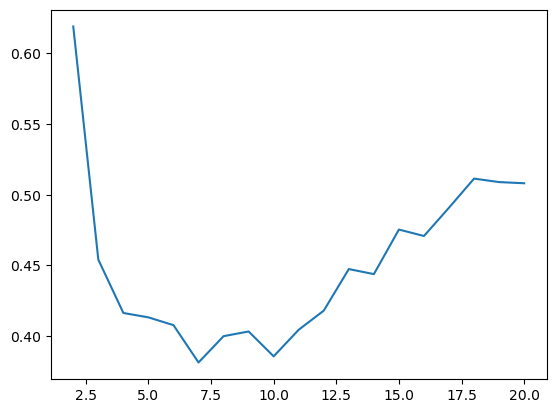

In [107]:
plt.plot(range(2,21), silhouette_scores)

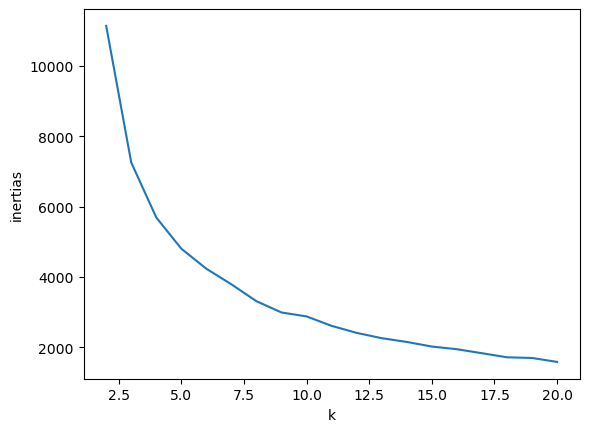

In [108]:
inertias = [model.inertia_ for model in KM_models]
inertias
plt.plot(range(2,21), inertias)
plt.xlabel('k')
plt.ylabel('inertias')
plt.show()

<AxesSubplot:ylabel='Cluster'>

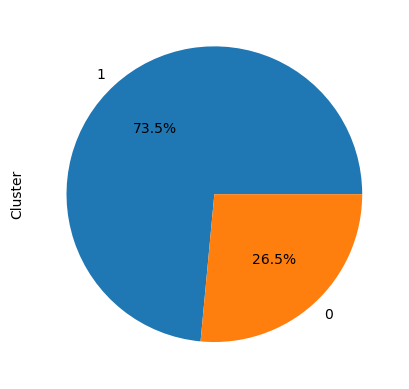

In [114]:

df_clusters = pd.DataFrame(kmeans.labels_, columns=['Cluster'])
df_clusters.head()
df_clusters['Cluster'].value_counts().plot.pie(autopct="%.1f%%")

<AxesSubplot:ylabel='Cluster'>

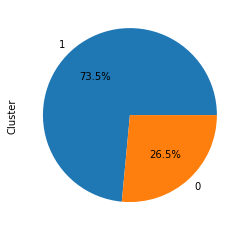

In [49]:
df_clusters['Cluster'].value_counts().plot.pie(autopct="%.1f%%")